## Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Business Objectives

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step1: Importing data

In [1]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset

lead_score = pd.read_csv("Leads.csv")

lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step2: Inspecting the dataframe

In [4]:
#Shape of dataframe

lead_score.shape

(9240, 37)

##### Observations:

- Dataframe contains 9240 rows and 37 features

In [5]:
#Checking the statistical info

lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking the type of each variable

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Observations:

- Looks there are lot of columns with null values
- Also noticed that some of the columns like 'Lead Profile', 'City' contains the default value 'Select' which is considered as null

### Step3: Handling missing data

In [7]:
#Replacing default value 'Select' with null

lead_score.replace('Select',np.nan, inplace=True)

In [8]:
#Checking the null values in percent

(lead_score.isnull().mean()*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
#Checking the features that have more than 45% of null values

feat_null_perc = (lead_score.isnull().mean()*100).sort_values(ascending=False)

feat_null_perc[feat_null_perc>45]

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Profile Score            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
dtype: float64

In [10]:
#dropping the feature that have more than 45% of null values

lead_score.drop(feat_null_perc[feat_null_perc>45].index, axis=1, inplace=True)

In [11]:
#Checking the null values percent again

(lead_score.isnull().mean()*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [12]:
#checking the number of unique values in a feature

unique_feat = lead_score.nunique()

unique_feat[unique_feat == 1]

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64

In [13]:
#Dropping features that have single value which is not useful for our analysis

lead_score.drop(unique_feat[unique_feat==1].index, axis=1, inplace=True)

In [14]:
#Checking the null values percent again

(lead_score.isnull().mean()*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Prospect ID                                       0.0000

##### Observations:

- Still there are few features missing values
- As they look relevant for our analysis, we can make null as 'Not Provided'

In [15]:
#function to replace null values 

lead_score['City'].fillna('Not Provided',inplace=True)
lead_score['Specialization'].fillna('Not Provided',inplace=True)
lead_score['Tags'].fillna('Not Provided',inplace=True)
lead_score['What matters most to you in choosing a course'].fillna('Not Provided',inplace=True)
lead_score['What is your current occupation'].fillna('Not Provided',inplace=True)
lead_score['Country'].fillna('Not Provided',inplace=True)

In [16]:
#Checking the null values percent once again

(lead_score.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Search                                           0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Tags                                             0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Specialization                                   0.000000
What matters most to you in choosing a course    0.000000
What is your current occupation                  0.000000
Lead Number   

##### Observations:

- Still there are some features missing values
- As they are less in percentage we can impute those missing rows

In [17]:
#checking the variable TotalVisits

round(lead_score['TotalVisits'].mean())

3

In [18]:
#impute the variable TotalVisits with mean

lead_score['TotalVisits'].fillna(3.0, inplace=True)

In [19]:
#checking the variable 'Page Views Per Visit'

round(lead_score['Page Views Per Visit'].mean())

2

In [20]:
#impute the variable 'Page Views Per Visit' with mean

lead_score['Page Views Per Visit'].fillna(2.00, inplace=True)

In [21]:
#checking the variable 'Last Activity'

lead_score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [22]:
lead_score['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [23]:
#impute the variable 'Last Activity' with mean

lead_score['Last Activity'].fillna('Email Opened', inplace=True)

In [24]:
#checking the variable 'Lead Source'

lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
lead_score['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [26]:
#impute the variable 'Lead Source' with mean

lead_score['Lead Source'].fillna('Google', inplace=True)

In [27]:
#Checking the null values percent once again

(lead_score.isnull().mean()*100).sort_values(ascending=False)

Prospect ID                                      0.0
What is your current occupation                  0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Number                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

*****All the missing values are handled*****

In [28]:
#checking the categorical columns

def check_cat_cont(col):
    return lead_score[col].value_counts()

for col in lead_score.columns.astype('category'):
    print(check_cat_cont(col))
    print('\n')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64


660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference   

In [29]:
#Variables 'Prospect ID' looks IDs which is not useful for our analysis so we can remove them

lead_score.drop(['Prospect ID'], axis=1, inplace=True)

In [30]:
# Making lead number as index

lead_score = lead_score.set_index('Lead Number')

In [31]:
#In 'Lead Source' feature 'Google' appeared twice due to case sensitive so lets correct it

lead_score.loc[lead_score['Lead Source'] == 'google', 'Lead Source'] = 'Google'

In [32]:
#Variable 'Country' values can be grouped together

lead_score.Country = np.where(((lead_score.Country != 'India') & (lead_score.Country != 'Not Provided')), 
                              'Other Country', lead_score.Country)

In [33]:
lead_score.Country.value_counts()

India            6492
Not Provided     2461
Other Country     287
Name: Country, dtype: int64

In [34]:
# Grouping 'Lead Source' variable

col_dict_ls = dict(lead_score['Lead Source'].value_counts()<1000)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_score['Lead Source']=lead_score['Lead Source'].replace(i,'Other Source')

In [35]:
# Grouping 'Last Activity' variable

col_dict_ls = dict(lead_score['Last Activity'].value_counts()<200)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_score['Last Activity']=lead_score['Last Activity'].replace(i,'Other Last Activity')

In [36]:
# Grouping 'Specialization' variable

col_dict_ls = dict(lead_score['Specialization'].value_counts()<100)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_score['Specialization']=lead_score['Specialization'].replace(i,'Other Specialization')

In [37]:
# Grouping 'Tags' variable

col_dict_ls = dict(lead_score['Tags'].value_counts()<100)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_score['Tags']=lead_score['Tags'].replace(i,'Other Tags')

In [38]:
# Grouping 'Last Notable Activity' variable

col_dict_ls = dict(lead_score['Last Notable Activity'].value_counts()<100)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_score['Last Notable Activity']=lead_score['Last Notable Activity'].replace(i,'Other Last Notable Activity')

In [39]:
#Checking the final rows and colums after data cleaning

lead_score.shape

(9240, 23)

### Step4: Exploratory Data Analysis

###### Outliers check

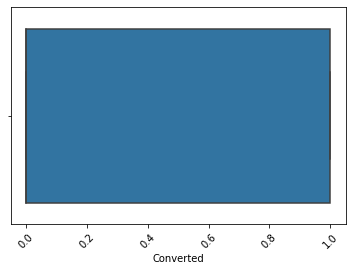

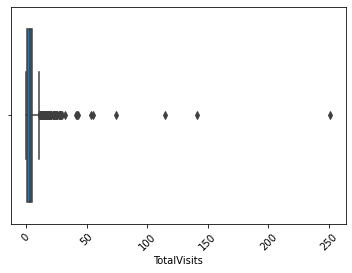

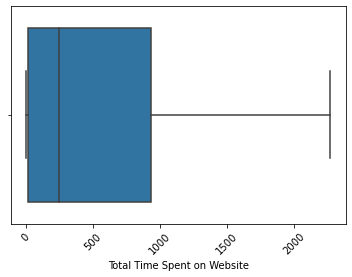

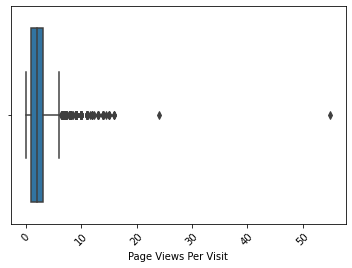

In [40]:
#Identify the outliers for the numerical columns for our analysis

for col in lead_score.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(lead_score[col])
    plt.ticklabel_format(style = 'plain', axis='x')
    plt.xticks(rotation=45)

##### Observations:

- Outliers observed in _'TotalVisits'_ and _'Page Views Per Visit'_

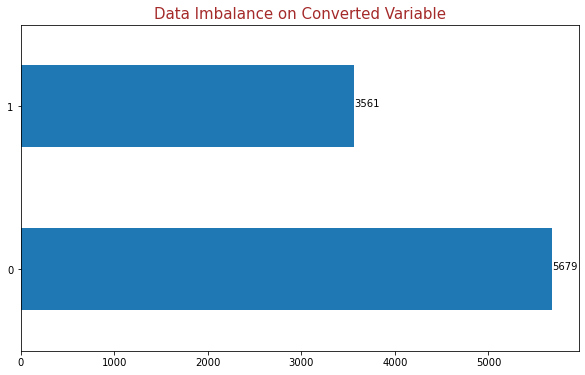

In [41]:
#Data imbalance check for TARGET variable using bar plot

plt.figure(figsize=(10,6))
lead_score['Converted'].value_counts().plot.barh()
plt.title('Data Imbalance on Converted Variable',fontdict={'fontsize': 15,'color':'Brown'})
# plt.xlabel('NO. OF CLIENTS')
# plt.ylabel('')

for index, value in enumerate(lead_score['Converted'].value_counts().values):
    plt.text(value, index,str(value))

plt.show()

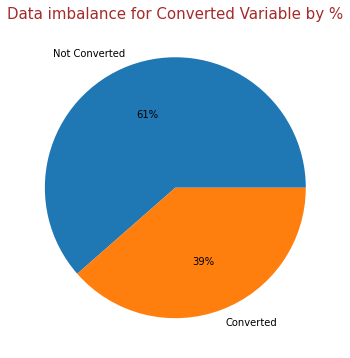

In [42]:
#Data imbalance check for TARGET variable 'Converted' using pie chart

plt.figure(figsize=(8,6))

labels = ['Not Converted','Converted']

Target_perc = lead_score.Converted.value_counts(normalize=True)*100

Target_perc.plot.pie(labels=labels,autopct='%1.0f%%',fontsize=10)
plt.title('Data imbalance for Converted Variable by %',fontdict={'fontsize': 15,'color':'Brown'})
plt.ylabel("")
plt.show()

### Univariate Analysis

#### Univariate Analysis of categorical variable

In [43]:
#Getting the categorical variables

cat_feat = lead_score.select_dtypes(exclude=np.number).columns

cat_feat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
def uni_cat_plot(feat):
    
    
    fig = plt.figure(figsize=(16,8))
      
    plt.subplot(1,2,1)
    lead_score[feat].value_counts().plot.pie(autopct = "%1.0f%%")
    plt.title('Plotting data for the variable:' + feat)
    
    plt.subplot(1,2,2)
    sns.countplot(data=lead_score,hue='Converted',x=feat)
    plt.xticks(rotation=90)
    plt.title('Plotting data for the target variable Converted vs:' + feat)
    
    fig.tight_layout()

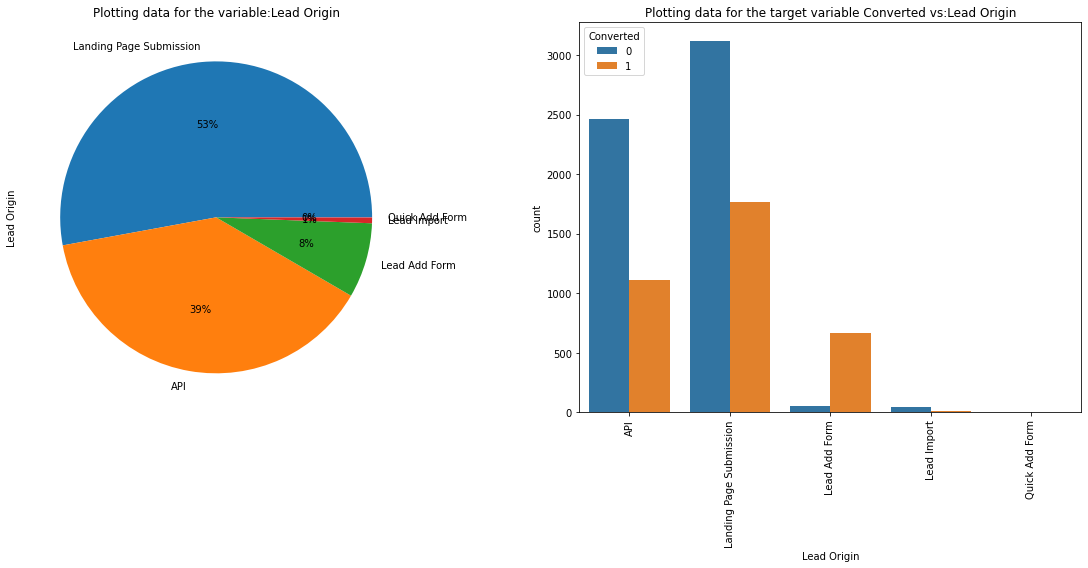

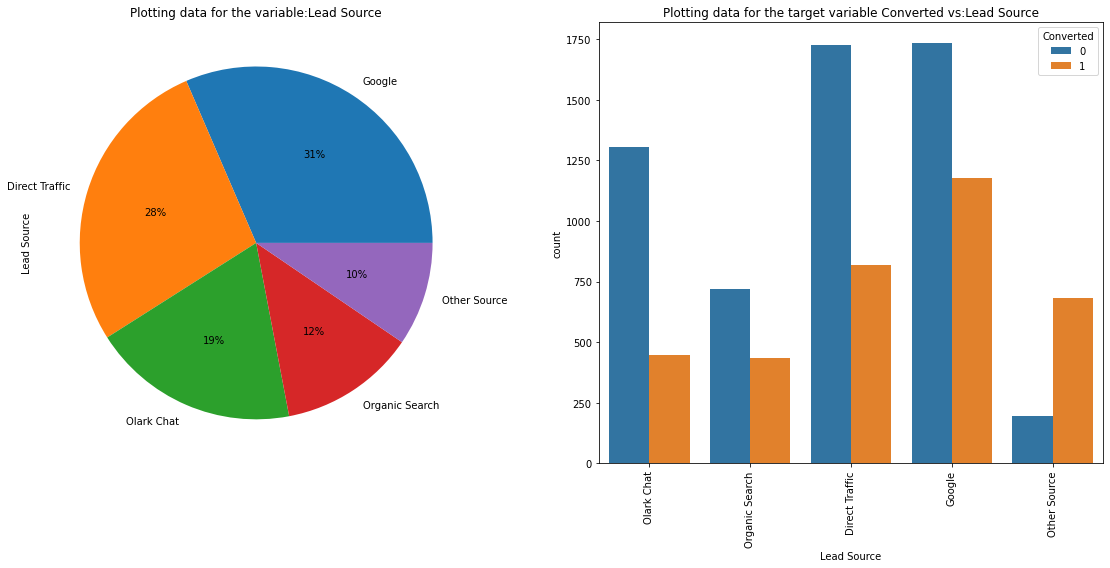

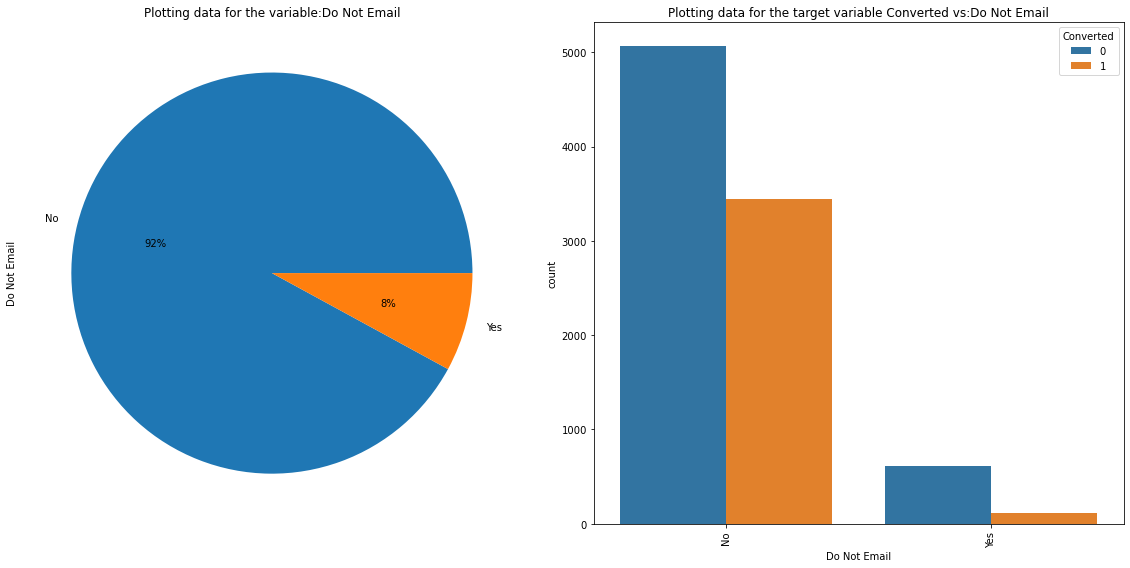

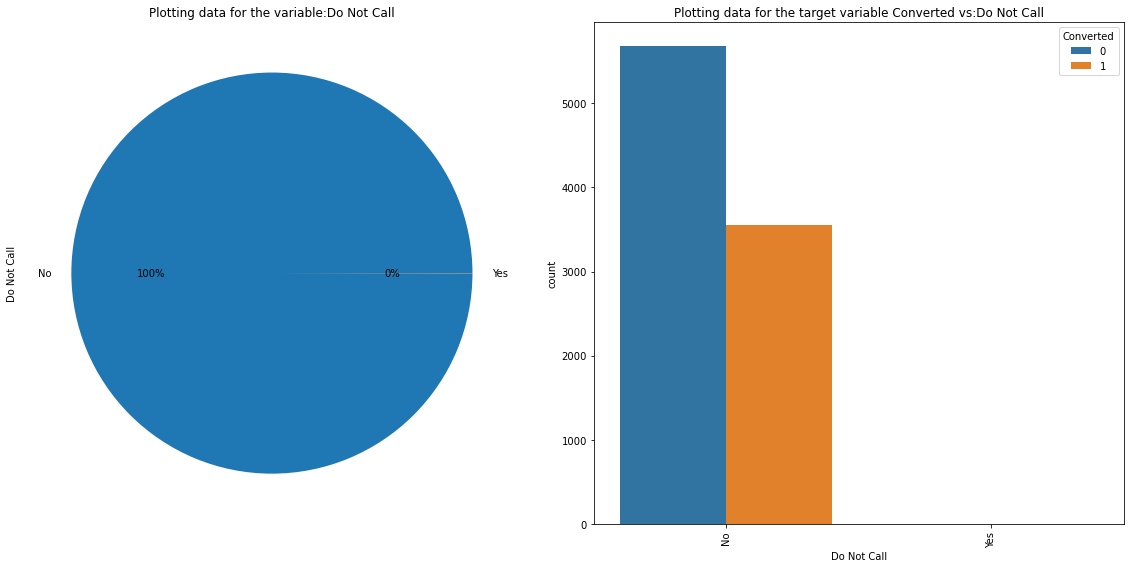

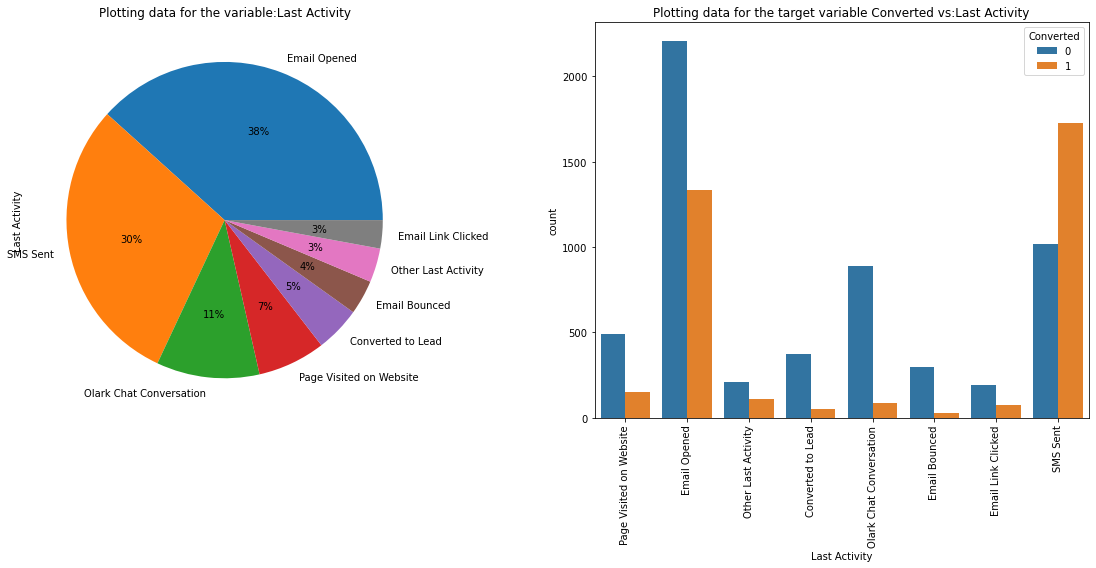

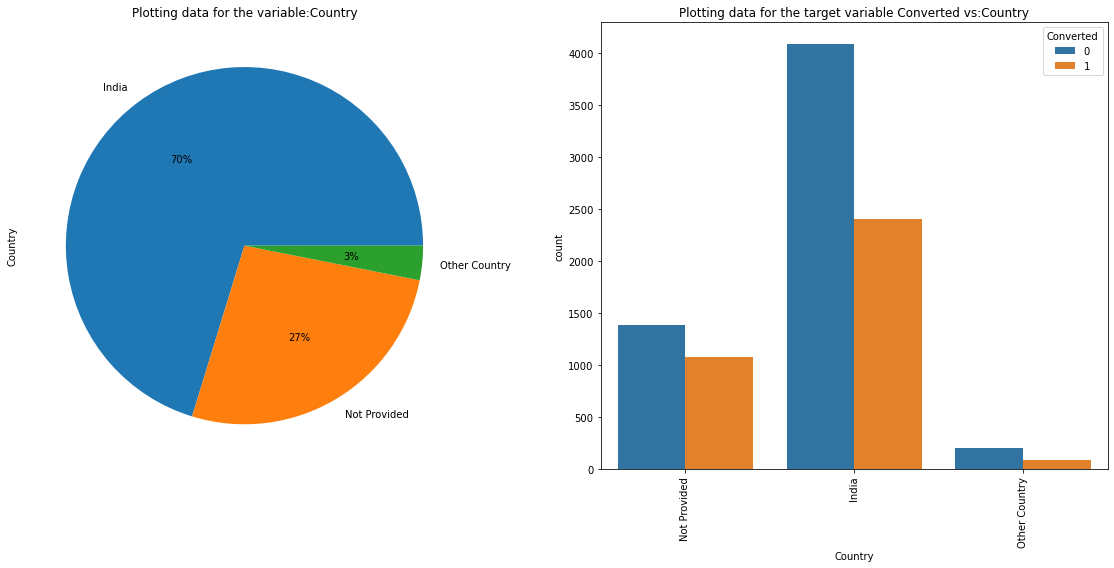

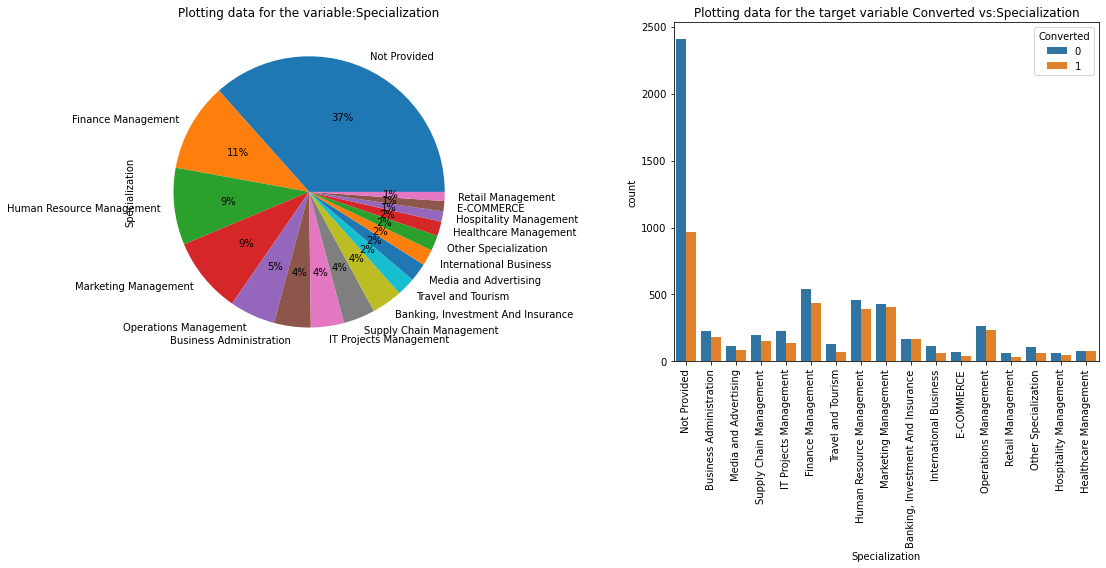

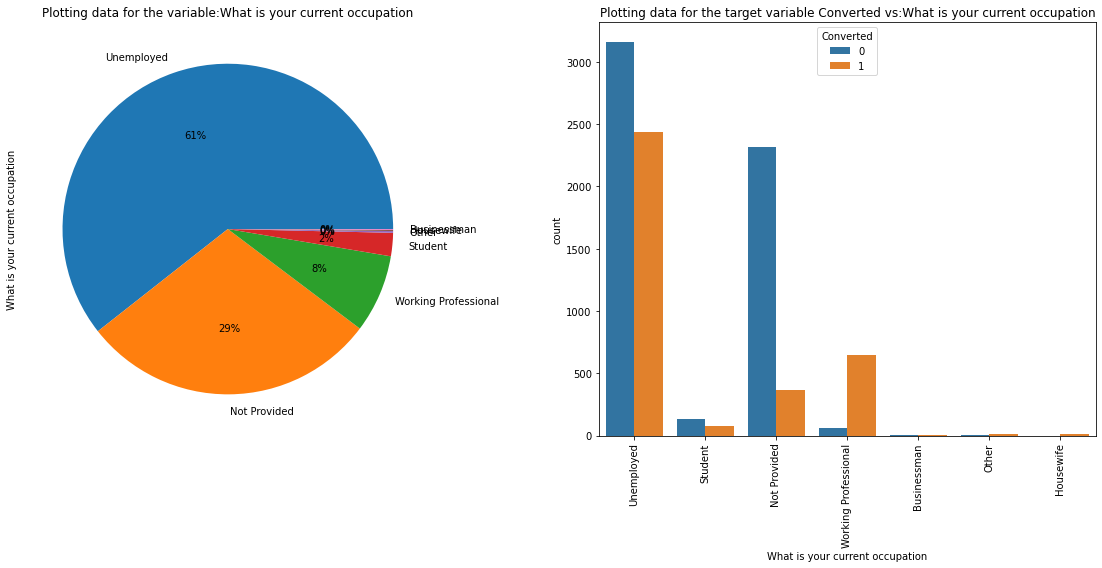

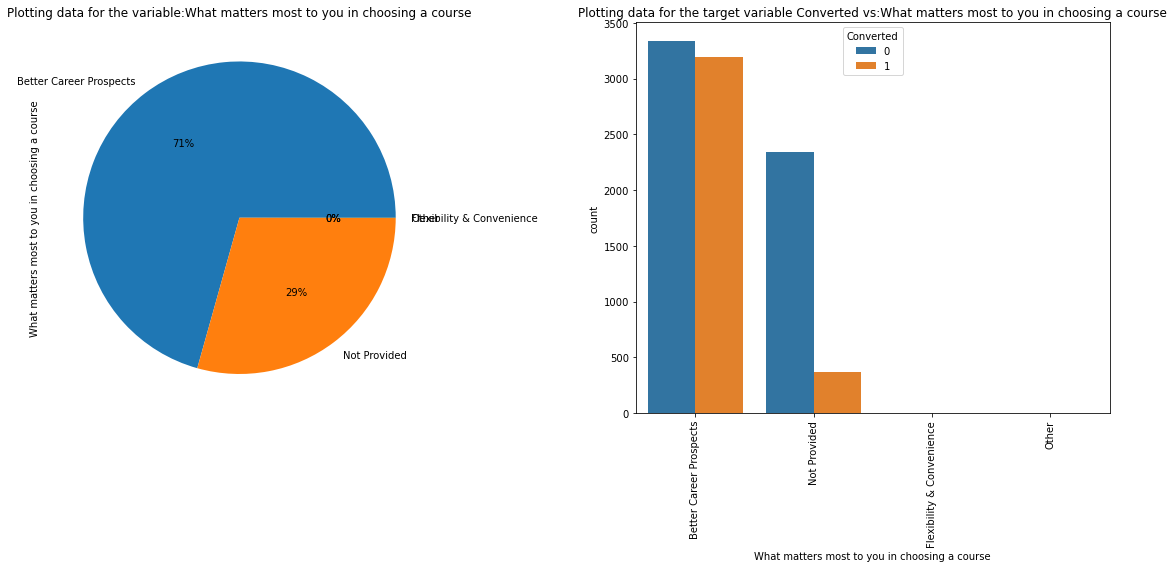

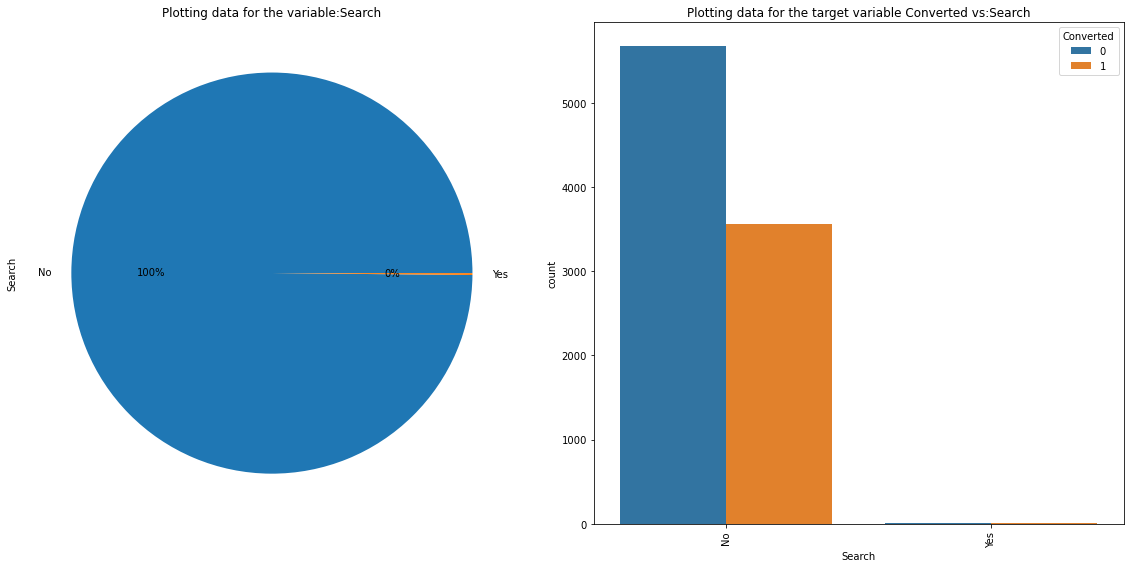

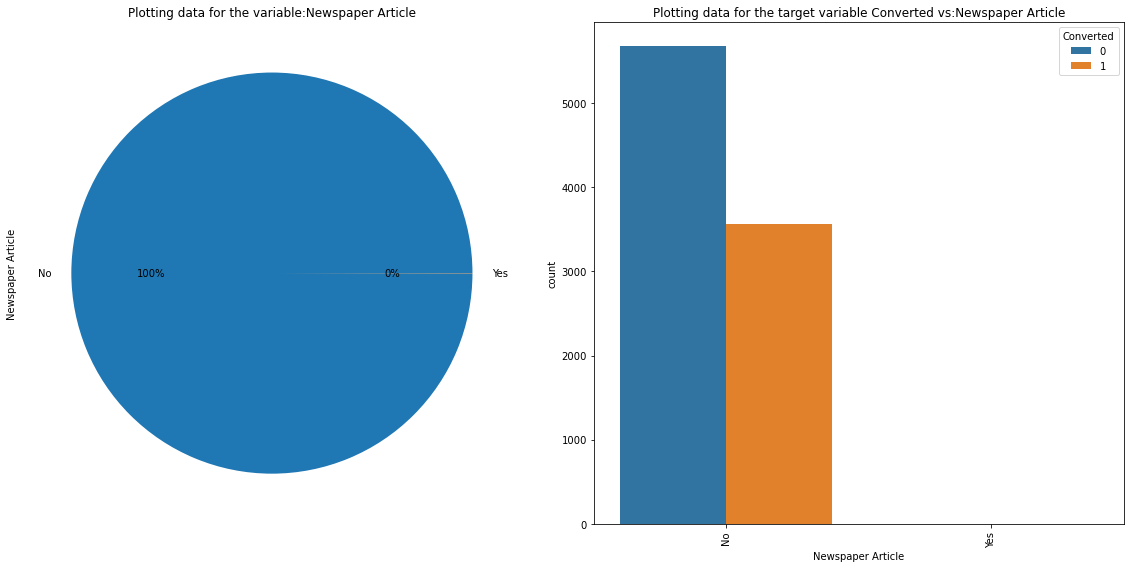

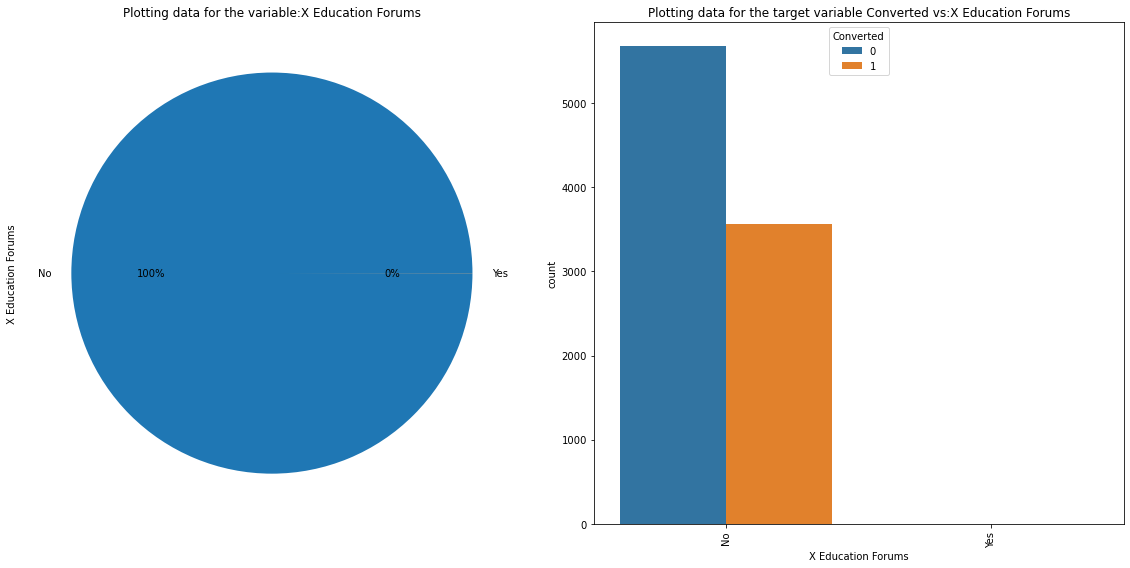

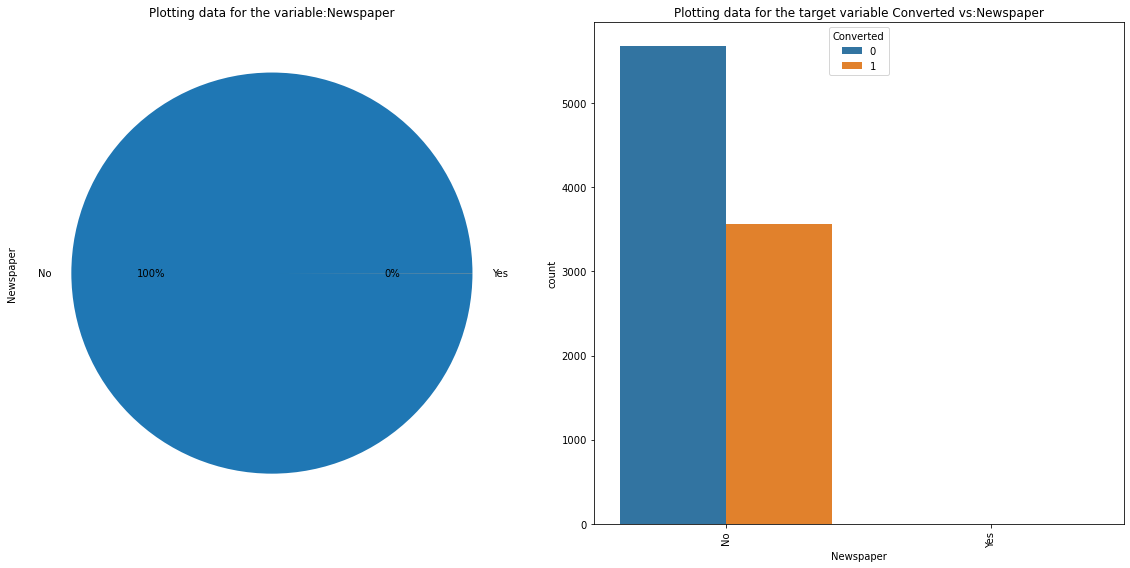

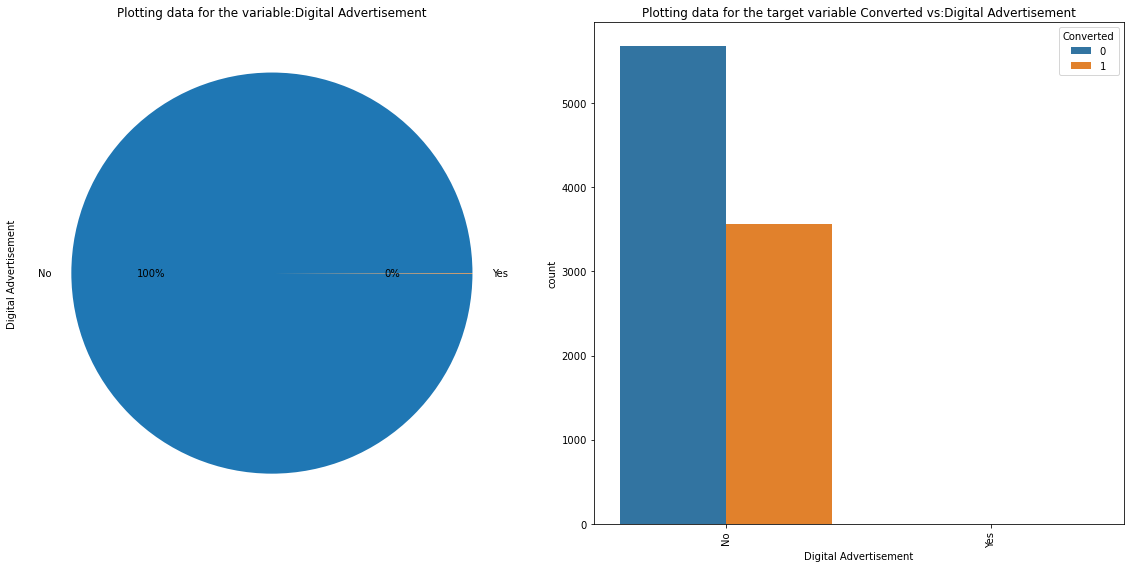

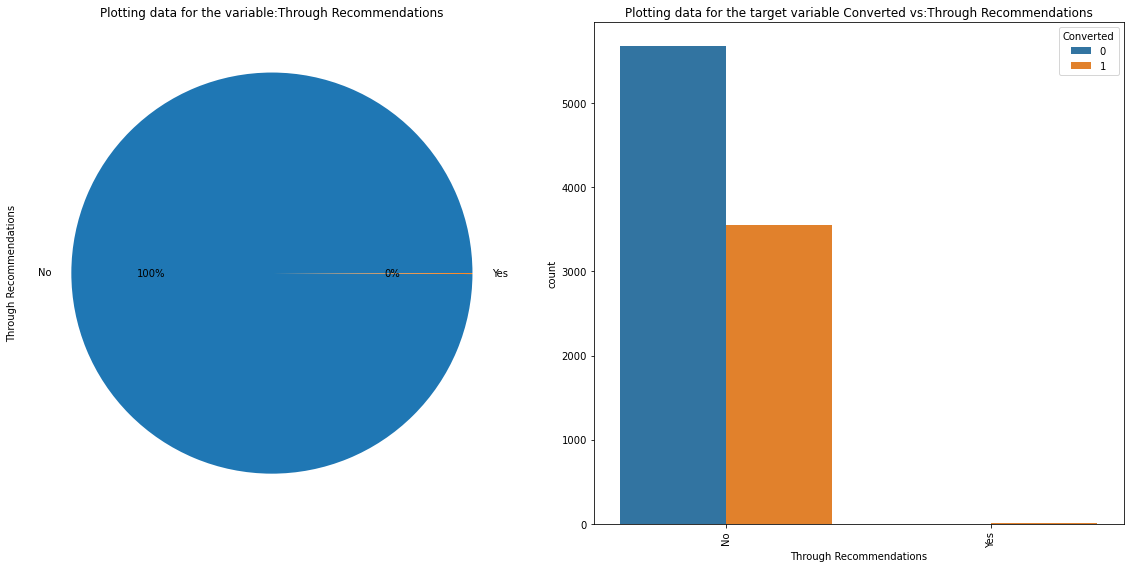

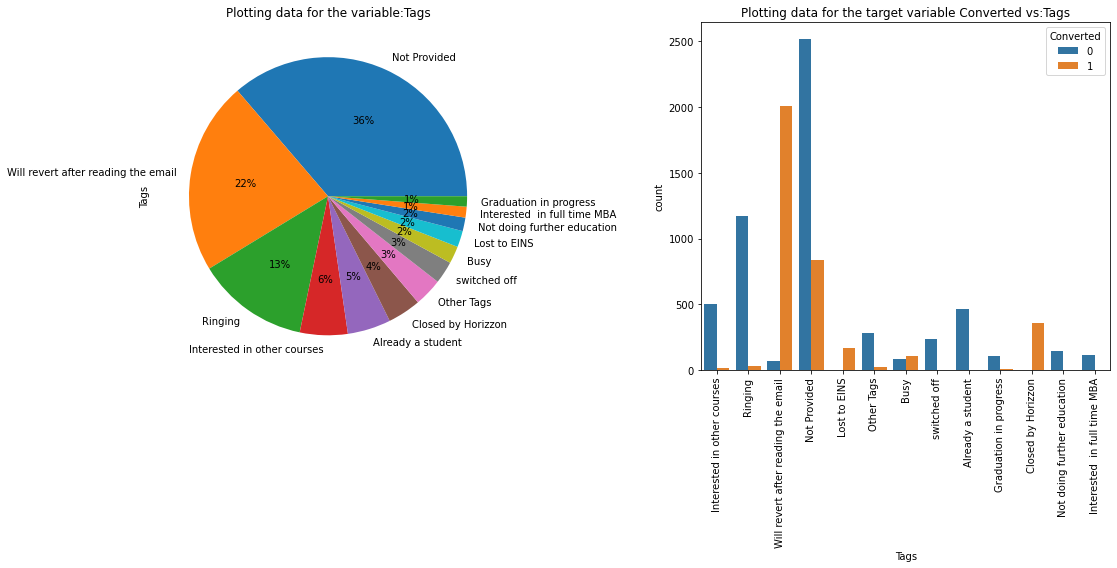

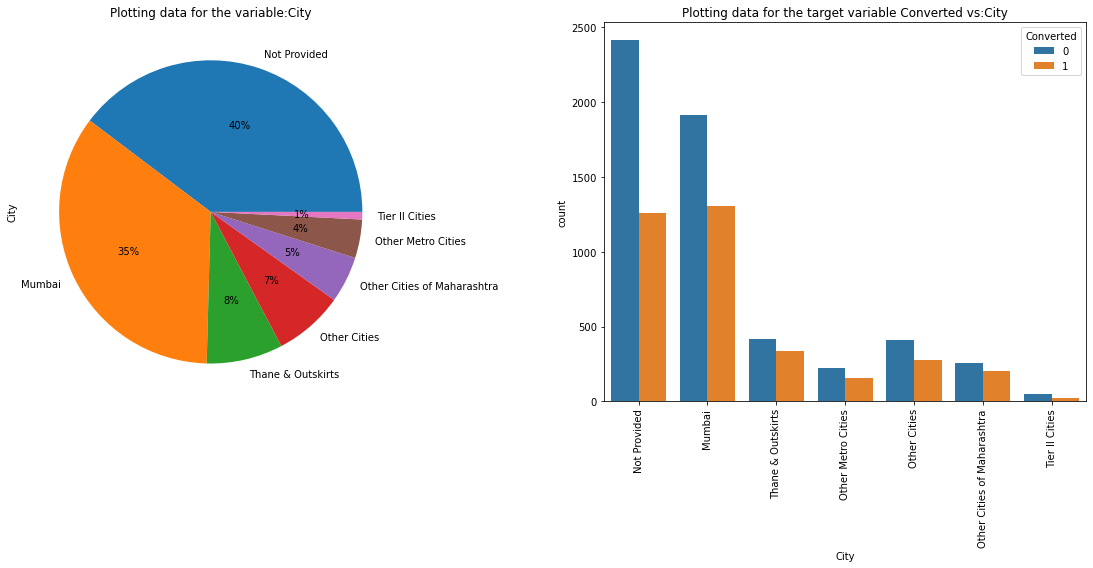

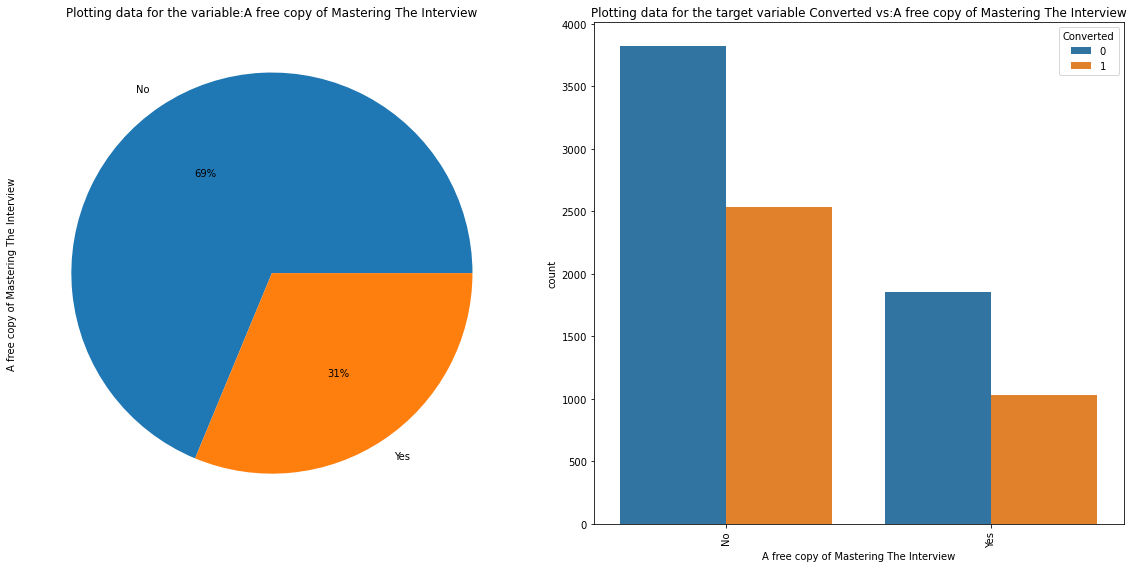

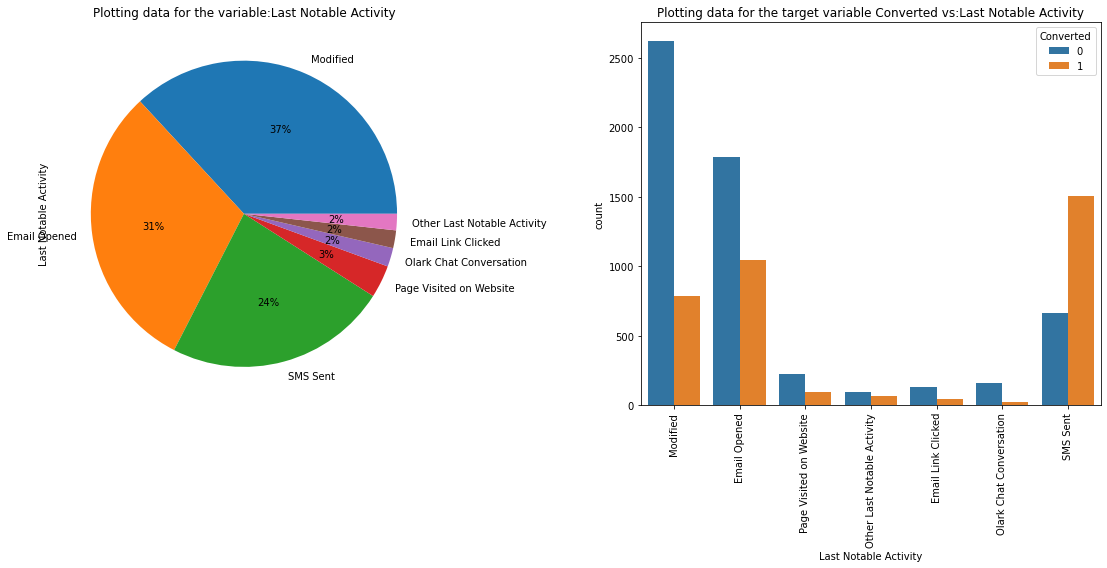

In [45]:
for var in cat_feat:
    uni_cat_plot(var)

###### Observations:

- Most of the leads are originated from Landing page and they converted to lead as well.
- Lead origin is from Google and most of them are converted too.
- Leads who's last activity was 'SMS Sent' or 'Email Opened' are converted.
- Most of leads are from India and some of them not provided their country details
- It looks most of the leads not specified their specialization
- Unemployed students are the leads and they converted as well
- Students who look for Better Career Prospects are high likely to convert
- Leads who respond after reading the email will also high chance to convert
- Most of the leads didn't given their city


- There are many columns that are highly skewed that can be removed as they may not add value to our analysis

In [46]:
#dropping highly skewed variables
lead_score = lead_score.drop(['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
                 'Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [47]:
lead_score.shape

(9240, 15)

#### Univariate Analysis of Numerical variables

In [48]:
#Getting the Numerical variables

num_feat = lead_score.select_dtypes(include=np.number).columns

num_feat

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [49]:
def uni_num_plot(feat):
    fig = plt.figure(figsize=(14,6))
    
    sns.histplot(data=lead_score,x=feat)
    
    plt.xticks(rotation=90)

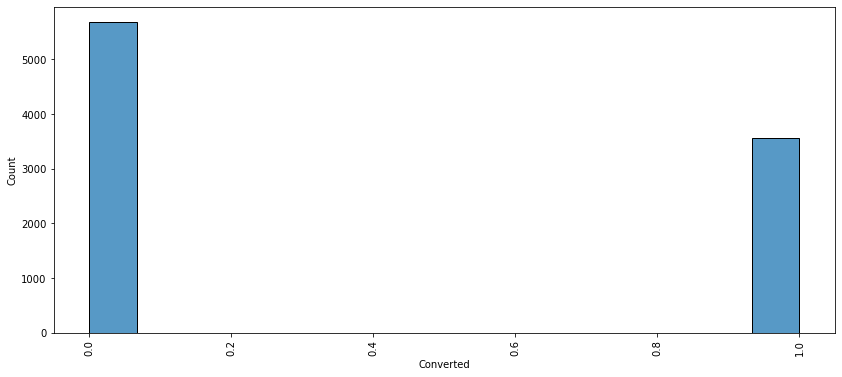

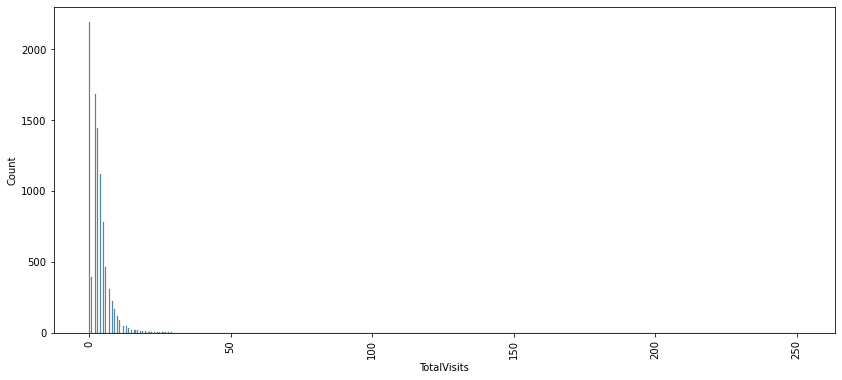

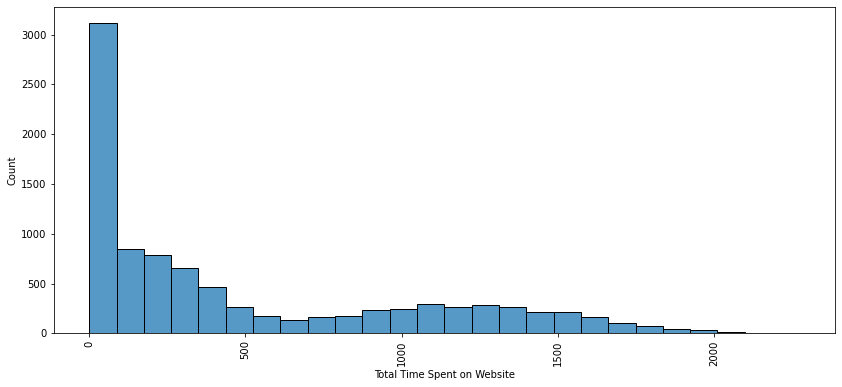

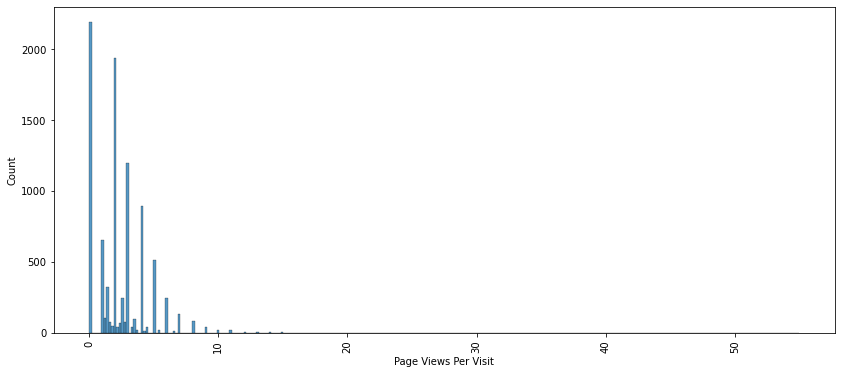

In [50]:
for var in num_feat:
    uni_num_plot(var)

### Bivariate Analysis

In [51]:
#plotting

def bi_plot(feat, feat1):
    fig = plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    sns.barplot(lead_score[feat],lead_score[feat1])
    plt.title('Plotting for the variables ' + feat + ' vs ' + feat1)
    plt.xticks(rotation=90)
    
     
    plt.subplot(1,2,2)
    sns.barplot(data=lead_score,x=feat, y=feat1,hue='Converted')
    plt.title('Plotting the target variable Converted vs ' + feat + ' vs ' + feat1)
    plt.xticks(rotation=90)

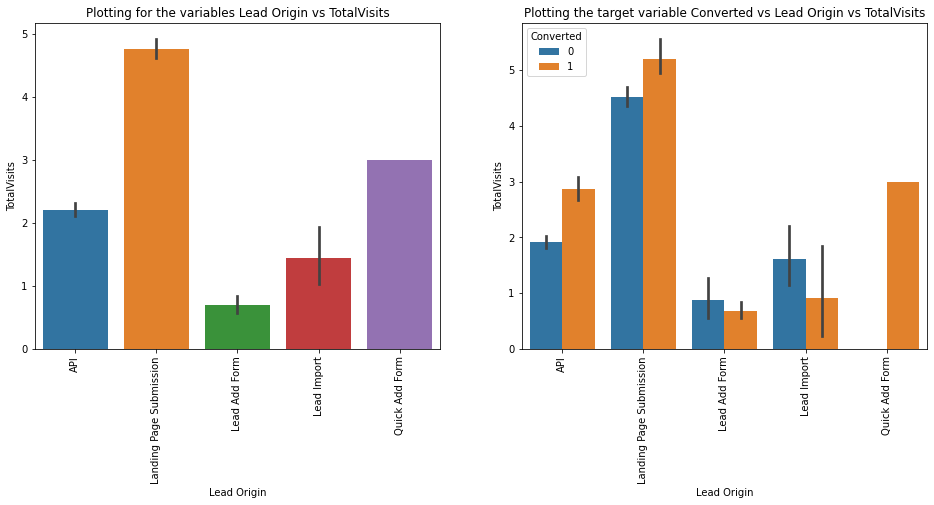

In [52]:
#'Lead Origin' vs 'TotalVisits'

bi_plot('Lead Origin','TotalVisits')

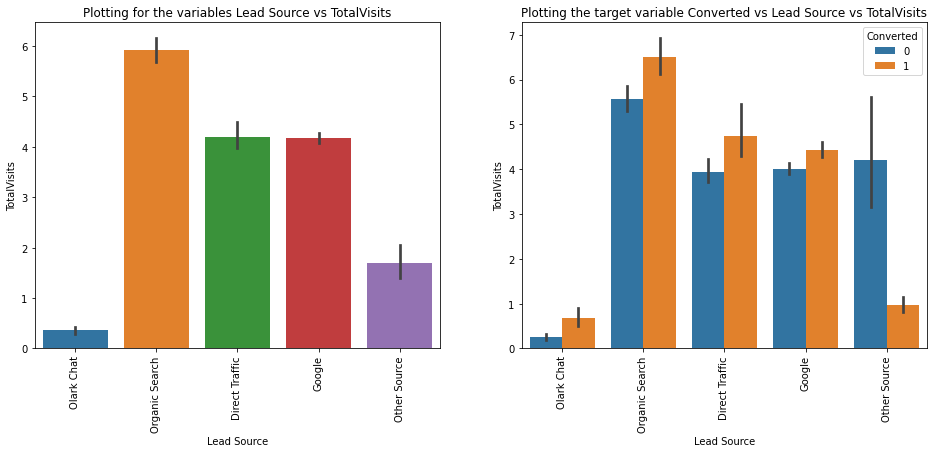

In [53]:
#'Lead Source' vs 'TotalVisits'

bi_plot('Lead Source','TotalVisits')

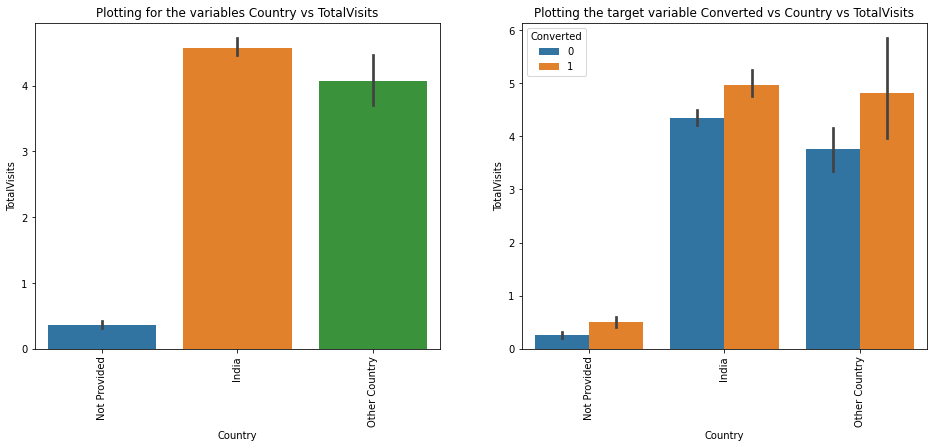

In [54]:
#'Country' vs 'TotalVisits'

bi_plot('Country','TotalVisits')

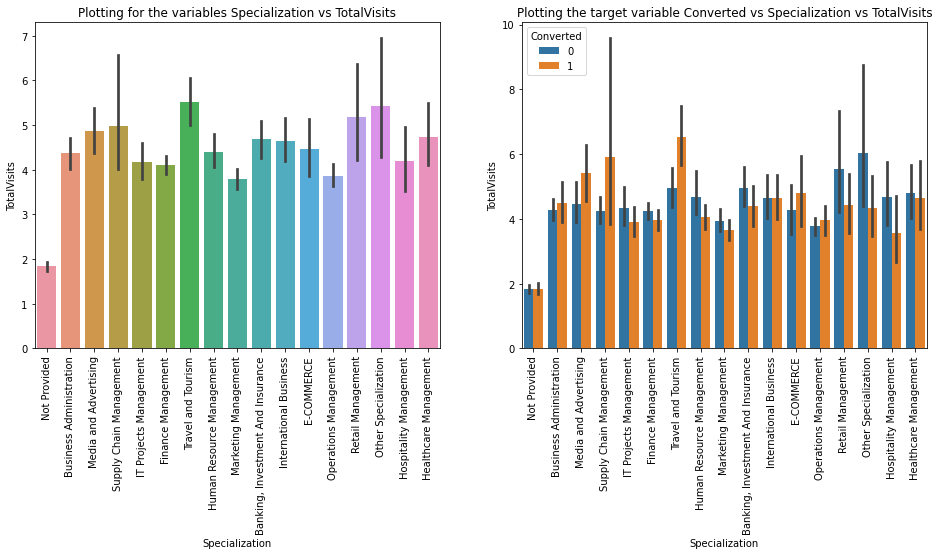

In [55]:
#'Specialization' vs 'TotalVisits'

bi_plot('Specialization','TotalVisits')

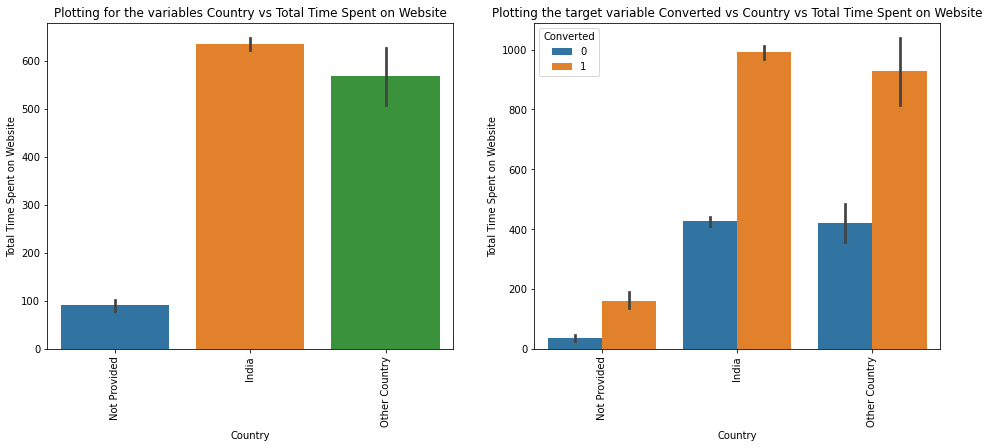

In [56]:
#'Country' vs 'Total Time Spent on Website'

bi_plot('Country','Total Time Spent on Website')

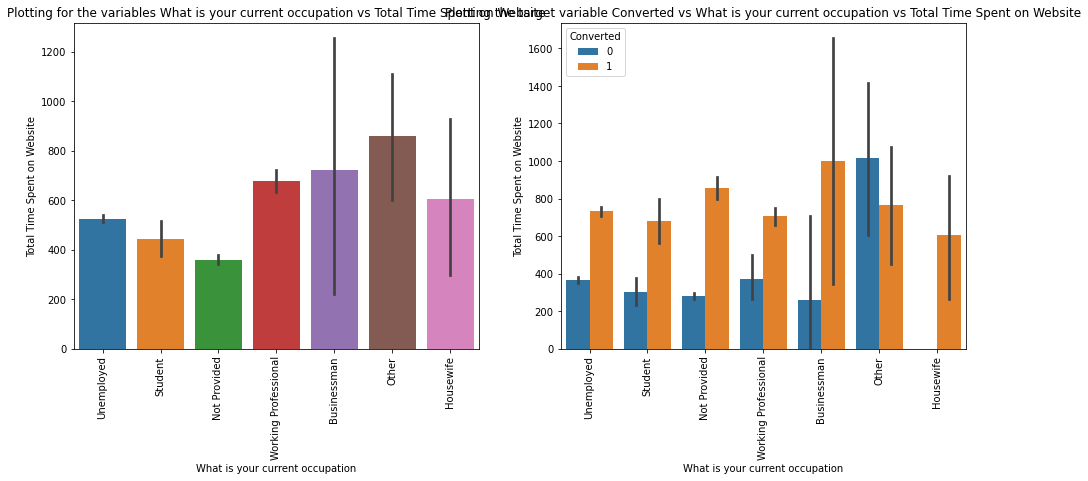

In [57]:
#'What is your current occupation' vs 'Total Time Spent on Website'

bi_plot('What is your current occupation','Total Time Spent on Website')

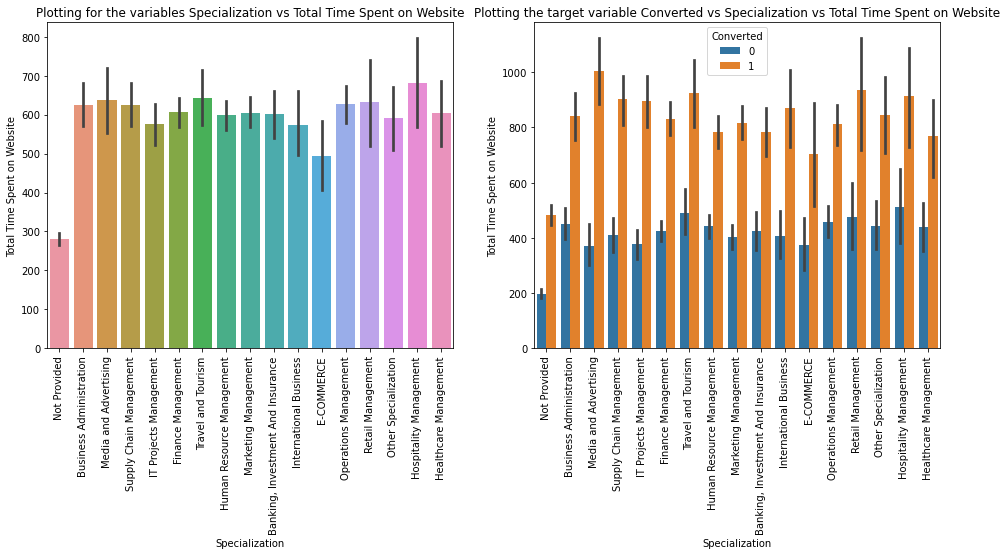

In [58]:
#'Specialization' vs 'Total Time Spent on Website'

bi_plot('Specialization','Total Time Spent on Website')

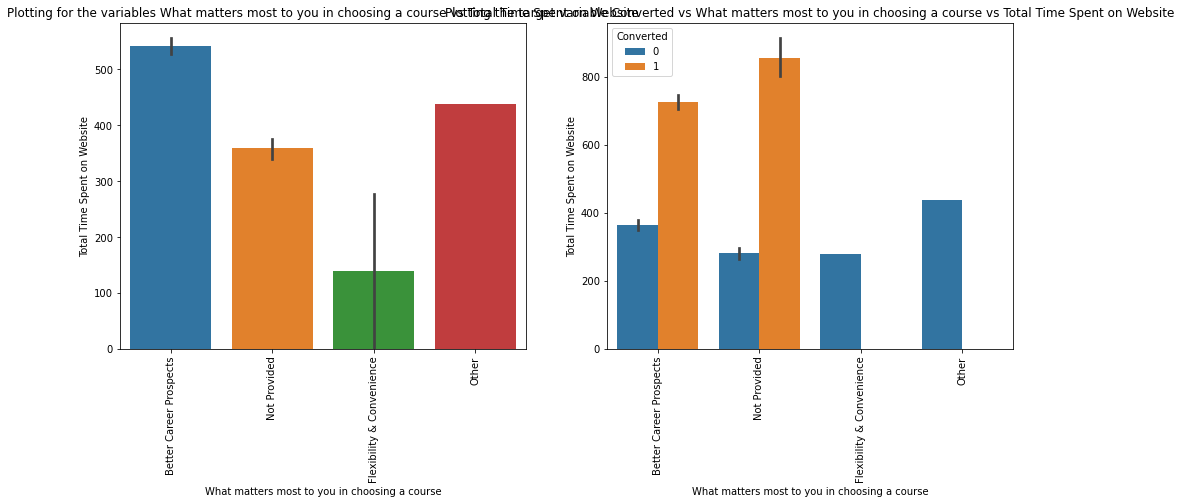

In [59]:
#'What matters most to you in choosing a course' vs 'Total Time Spent on Website'

bi_plot('What matters most to you in choosing a course','Total Time Spent on Website')

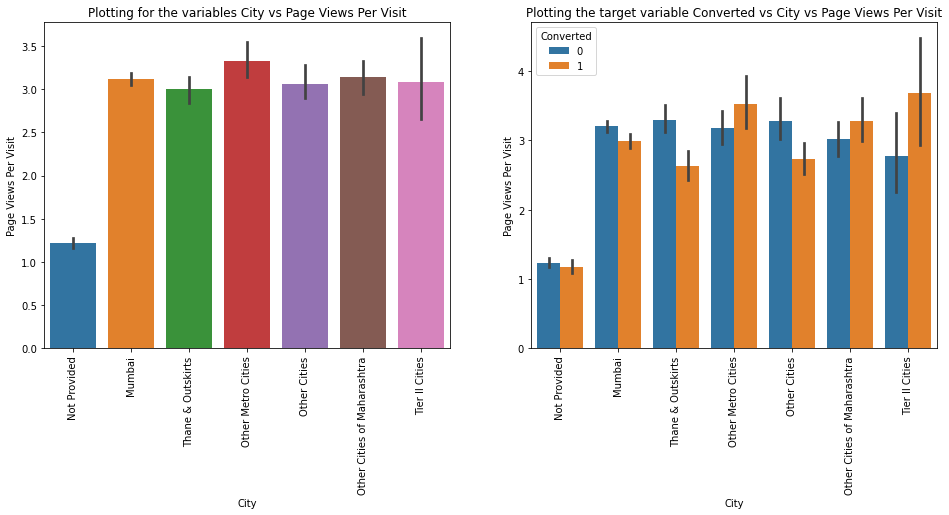

In [60]:
#'City' vs 'Page Views Per Visit'

bi_plot('City','Page Views Per Visit')

###### Correlation

<AxesSubplot:>

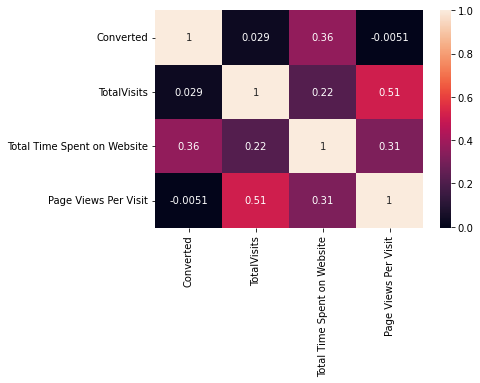

In [61]:
sns.heatmap(lead_score.corr(),annot=True)

##### Observations:

- High correlation observed between 'TotalVisits' and 'Pages Views Per Visit'
- Noticed correlation between the target variable 'Converted' and 'Total Time Spent on Website'

### Step 5: Data Preparation

In [62]:
#Checking all the categorical variables
cat_feat = lead_score.select_dtypes(exclude=np.number).columns

cat_feat

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(lead_score[cat_feat], drop_first=True)

# Add the results to the dataframe
lead_score_dum = pd.concat([lead_score, dummy], axis=1)

lead_score_dum.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,...,0,0,0,0,0,1,0,0,0,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,...,0,0,0,0,1,0,0,0,0,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,0,1,1,0,0,0,0,0
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,India,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [64]:
#Dropping the variables for that dummies created

lead_score_dum = lead_score_dum.drop(cat_feat, axis=1)

lead_score_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
660719,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Step 6: Test-Train Split

In [65]:
#importing the required library

from sklearn.model_selection import train_test_split

In [66]:
# Assigning feature variable to X

X = lead_score_dum.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
# Assigning the target variable to y

y = lead_score_dum['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [68]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Step 7: Feature Scaling

In [69]:
#importing the required library

from sklearn.preprocessing import MinMaxScaler

In [70]:
num_feat

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [71]:
# Scale the three numeric features
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
630013,0.007968,0.182867,0.083333,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
585643,0.019920,0.679538,0.208333,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
631406,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
660458,0.023904,0.504660,0.062500,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
633361,0.011952,0.445184,0.125000,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [72]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
TotalVisits,1.000000,0.210033,0.483334,0.280137,-0.159471,-0.026166,NaN,0.100960,-0.298014,0.192745,...,0.033380,0.073381,0.012241,0.199199,0.039574,-0.107015,-0.026847,0.000166,0.235502,-0.012787
Total Time Spent on Website,0.210033,1.000000,0.339491,0.279236,-0.146994,-0.028067,NaN,0.197619,-0.386360,0.106874,...,0.048733,0.071782,0.017280,0.170909,0.007008,-0.100310,-0.045723,0.012372,0.033011,0.113953
Page Views Per Visit,0.483334,0.339491,1.000000,0.501476,-0.273330,-0.041729,NaN,0.219590,-0.517779,0.309606,...,0.090186,0.094965,0.033798,0.286867,0.074521,-0.107085,-0.082025,0.006049,0.035091,0.055987
Lead Origin_Landing Page Submission,0.280137,0.279236,0.501476,1.000000,-0.308847,-0.078392,NaN,0.093153,-0.513365,0.050235,...,0.156031,0.149612,0.080701,0.570659,0.068041,-0.103136,-0.108122,0.017545,0.040212,0.057844
Lead Origin_Lead Add Form,-0.159471,-0.146994,-0.273330,-0.308847,1.000000,-0.022051,NaN,-0.163330,-0.142963,-0.110576,...,-0.053186,0.005797,-0.019506,-0.181517,-0.048521,-0.017947,-0.036489,-0.005615,-0.022931,0.097715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Modified,-0.107015,-0.100310,-0.107085,-0.103136,-0.017947,0.041698,NaN,-0.017782,0.094016,-0.017643,...,-0.047276,-0.029346,0.020145,-0.083434,-0.506235,1.000000,-0.105772,-0.097450,-0.147429,-0.428059
Last Notable Activity_Olark Chat Conversation,-0.026847,-0.045723,-0.082025,-0.108122,-0.036489,-0.010330,NaN,-0.027456,0.160519,-0.024041,...,-0.009927,-0.023808,-0.012187,-0.057353,-0.091243,-0.105772,1.000000,-0.017564,-0.026572,-0.077152
Last Notable Activity_Other Last Notable Activity,0.000166,0.012372,0.006049,0.017545,-0.005615,-0.009517,NaN,0.017269,-0.021686,0.008608,...,0.012935,-0.005548,-0.011228,0.008946,-0.084064,-0.097450,-0.017564,1.000000,-0.024481,-0.071082
Last Notable Activity_Page Visited on Website,0.235502,0.033011,0.035091,0.040212,-0.022931,-0.014398,NaN,0.005570,-0.050005,-0.003800,...,-0.012657,0.017131,-0.007474,0.027084,-0.127177,-0.147429,-0.026572,-0.024481,1.000000,-0.107537


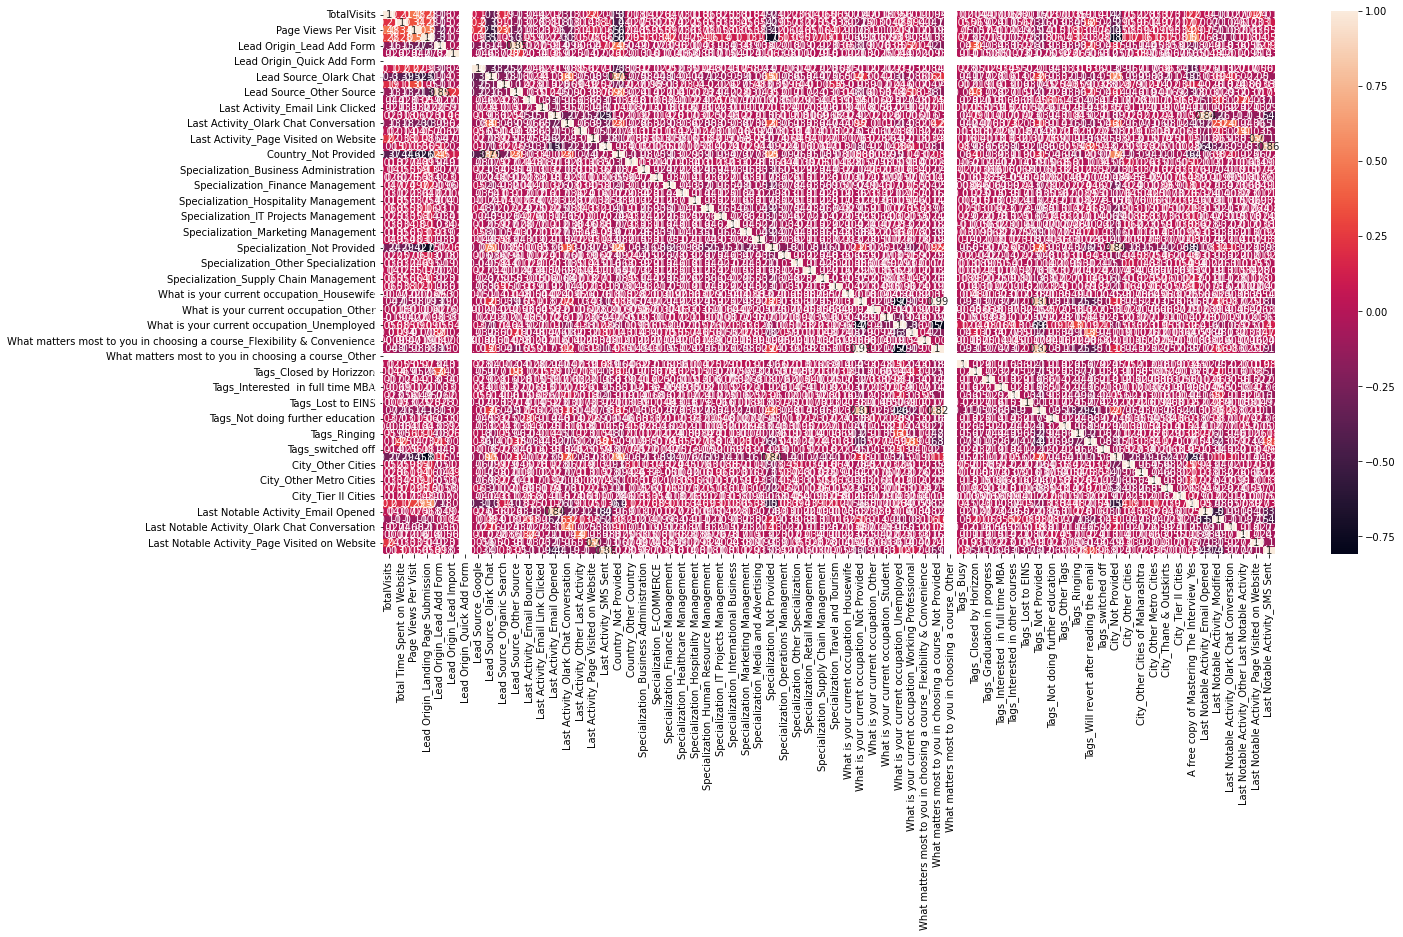

In [73]:
#Looking the correlations

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

We can't read anything from the heatmap as there are lot of variables. We will use RFE method to eliminate the features.

### Step 8: Model Building

##### Feature selection using RFE

In [74]:
#import logisticregression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
#import RFE

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 55),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other Source', False, 25),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 16),
 ('Last Activity_Other Last Activity', False, 20),
 ('Last Activity_Page Visited on Website', False, 51),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Not Provided', False, 2),
 ('Country_Other Country', False, 23),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-COMMERCE', False, 35),
 ('Specialization_Finance Management', F

In [77]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [78]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [79]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not Provided',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Provided', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

##### Assessing the model with StatsModel

In [80]:
# Importing statsmodels
import statsmodels.api as sm

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.7
Date:                Tue, 18 Oct 2022   Deviance:                       2297.3
Time:                        14:12:34   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6251
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -4.1316      0.205    -20.194      0.000      -4.533      -3.731
TotalVisits                                                    2.8062      1.801      1.558      0.119      -0.723       6.336
Total Time Spent on Website                                    3.6791      0.233     15.787      0.000       3.222       4.136
Lead Origin_Lead Add Form                                      1.7741      0.310      5.724      0.000       1.167       2.382
Last Activity_Email Bounced                                   -1.4463      0.416     -3.481      0.000      -2.261      -0.632
Last Activity_SMS Sent                                         1.9438      0.125     15.558      0.000       1.699       2.189
What matters most to you in choosing a course_Not Provided    -2.7916      0.159    -17.582      0.000      -3.103      -2.480
Tags_Busy                                                      2.3989      0.276      8.681      0.000       1.857       2.940
Tags_Closed by Horizzon                                        8.3793      0.749     11.190      0.000       6.912       9.847
Tags_Lost to EINS                                              8.8105      0.636     13.848      0.000       7.563      10.057
Tags_Not Provided                                              4.0230      0.223     18.023      0.000       3.586       4.461
Tags_Ringing                                                  -1.7105      0.302     -5.662      0.000      -2.303      -1.118
Tags_Will revert after reading the email                       6.3505      0.245     25.969      0.000       5.871       6.830
Tags_switched off                                             -3.1656      1.029     -3.076      0.002      -5.183      -1.148
Last Notable Activity_Modified                                -1.4732      0.129    -11.430      0.000      -1.726      -1.221
Last Notable Activity_Olark Chat Conversation                 -1.4239      0.444     -3.205      0.001      -2.295      -0.553
==============================================================================================================================
"""

In [82]:
# Importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Make a VIF dataframe for all the variables present
def vif_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [84]:
#calculate VIF

vif_cal(X_train[col])

,Features,VIF
9,Tags_Not Provided,5.11
5,What matters most to you in choosing a course_...,4.59
1,Total Time Spent on Website,2.12
11,Tags_Will revert after reading the email,1.99
4,Last Activity_SMS Sent,1.66
13,Last Notable Activity_Modified,1.52
0,TotalVisits,1.48
2,Lead Origin_Lead Add Form,1.48
7,Tags_Closed by Horizzon,1.38
10,Tags_Ringing,1.23


 - High (>0.05) p-value observed for the variable 'TotalVisits'. So it can be dropped off.

In [85]:
col = col.drop(['TotalVisits'],1)

#### Model 2

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1149.6
Date:                Tue, 18 Oct 2022   Deviance:                       2299.1
Time:                        14:12:34   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6250
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -4.0868      0.202    -20.276      0.000      -4.482      -3.692
Total Time Spent on Website                                    3.7151      0.232     16.021      0.000       3.261       4.170
Lead Origin_Lead Add Form                                      1.7533      0.309      5.668      0.000       1.147       2.360
Last Activity_Email Bounced                                   -1.4562      0.414     -3.514      0.000      -2.269      -0.644
Last Activity_SMS Sent                                         1.9339      0.125     15.510      0.000       1.690       2.178
What matters most to you in choosing a course_Not Provided    -2.7774      0.158    -17.558      0.000      -3.087      -2.467
Tags_Busy                                                      2.3952      0.277      8.661      0.000       1.853       2.937
Tags_Closed by Horizzon                                        8.3743      0.748     11.189      0.000       6.907       9.841
Tags_Lost to EINS                                              8.7839      0.635     13.825      0.000       7.539      10.029
Tags_Not Provided                                              4.0058      0.223     18.002      0.000       3.570       4.442
Tags_Ringing                                                  -1.7112      0.302     -5.662      0.000      -2.303      -1.119
Tags_Will revert after reading the email                       6.3413      0.244     25.961      0.000       5.863       6.820
Tags_switched off                                             -3.1672      1.029     -3.077      0.002      -5.184      -1.150
Last Notable Activity_Modified                                -1.4805      0.129    -11.504      0.000      -1.733      -1.228
Last Notable Activity_Olark Chat Conversation                 -1.4182      0.441     -3.219      0.001      -2.282      -0.555
==============================================================================================================================
"""

In [87]:
#calculate VIF

vif_cal(X_train[col])

,Features,VIF
8,Tags_Not Provided,5.07
4,What matters most to you in choosing a course_...,4.59
0,Total Time Spent on Website,1.99
10,Tags_Will revert after reading the email,1.95
3,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.52
1,Lead Origin_Lead Add Form,1.47
6,Tags_Closed by Horizzon,1.37
9,Tags_Ringing,1.18
7,Tags_Lost to EINS,1.11


- 'Tags_Not Provided' have high (>5) VIF value. So we will drop it.

In [88]:
col = col.drop(['Tags_Not Provided'],1)

#### Model 3

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.2
Date:                Tue, 18 Oct 2022   Deviance:                       2770.3
Time:                        14:12:35   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5967
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.9577      0.102    -19.210      0.000      -2.157      -1.758
Total Time Spent on Website                                    3.3164      0.204     16.287      0.000       2.917       3.715
Lead Origin_Lead Add Form                                      2.6814      0.265     10.110      0.000       2.162       3.201
Last Activity_Email Bounced                                   -1.2346      0.406     -3.043      0.002      -2.030      -0.439
Last Activity_SMS Sent                                         2.0384      0.111     18.397      0.000       1.821       2.256
What matters most to you in choosing a course_Not Provided    -0.8051      0.115     -6.996      0.000      -1.031      -0.580
Tags_Busy                                                      0.3644      0.227      1.602      0.109      -0.081       0.810
Tags_Closed by Horizzon                                        6.3214      0.728      8.685      0.000       4.895       7.748
Tags_Lost to EINS                                              5.6817      0.550     10.321      0.000       4.603       6.761
Tags_Ringing                                                  -3.8768      0.259    -14.962      0.000      -4.385      -3.369
Tags_Will revert after reading the email                       4.3557      0.182     23.956      0.000       3.999       4.712
Tags_switched off                                             -5.2351      1.016     -5.154      0.000      -7.226      -3.244
Last Notable Activity_Modified                                -1.7251      0.118    -14.560      0.000      -1.957      -1.493
Last Notable Activity_Olark Chat Conversation                 -0.7629      0.381     -2.004      0.045      -1.509      -0.017
==============================================================================================================================
"""

In [90]:
#calculate VIF

vif_cal(X_train[col])

,Features,VIF
0,Total Time Spent on Website,1.89
9,Tags_Will revert after reading the email,1.81
3,Last Activity_SMS Sent,1.58
11,Last Notable Activity_Modified,1.51
4,What matters most to you in choosing a course_...,1.43
1,Lead Origin_Lead Add Form,1.41
6,Tags_Closed by Horizzon,1.33
8,Tags_Ringing,1.15
2,Last Activity_Email Bounced,1.08
5,Tags_Busy,1.06


 - 'Tags_Busy' variable shows high p-value so it can dropped.

In [91]:
col = col.drop(['Tags_Busy'],1)

#### Model 4

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.4
Date:                Tue, 18 Oct 2022   Deviance:                       2772.9
Time:                        14:12:35   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5965
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.9248      0.099    -19.362      0.000      -2.120      -1.730
Total Time Spent on Website                                    3.3303      0.203     16.376      0.000       2.932       3.729
Lead Origin_Lead Add Form                                      2.6515      0.265     10.003      0.000       2.132       3.171
Last Activity_Email Bounced                                   -1.2470      0.404     -3.083      0.002      -2.040      -0.454
Last Activity_SMS Sent                                         2.0647      0.110     18.816      0.000       1.850       2.280
What matters most to you in choosing a course_Not Provided    -0.8514      0.111     -7.640      0.000      -1.070      -0.633
Tags_Closed by Horizzon                                        6.2963      0.728      8.653      0.000       4.870       7.722
Tags_Lost to EINS                                              5.6733      0.552     10.285      0.000       4.592       6.754
Tags_Ringing                                                  -3.9319      0.257    -15.301      0.000      -4.436      -3.428
Tags_Will revert after reading the email                       4.3227      0.181     23.934      0.000       3.969       4.677
Tags_switched off                                             -5.2953      1.015     -5.216      0.000      -7.285      -3.306
Last Notable Activity_Modified                                -1.7327      0.118    -14.651      0.000      -1.965      -1.501
Last Notable Activity_Olark Chat Conversation                 -0.7806      0.381     -2.049      0.040      -1.527      -0.034
==============================================================================================================================
"""

In [93]:
#calculate VIF

vif_cal(X_train[col])

,Features,VIF
0,Total Time Spent on Website,1.85
8,Tags_Will revert after reading the email,1.77
3,Last Activity_SMS Sent,1.54
10,Last Notable Activity_Modified,1.51
4,What matters most to you in choosing a course_...,1.42
1,Lead Origin_Lead Add Form,1.41
5,Tags_Closed by Horizzon,1.33
7,Tags_Ringing,1.14
2,Last Activity_Email Bounced,1.08
6,Tags_Lost to EINS,1.06


 - All variables p-value are less than 0.05 and VIFs are also less than 5
 - So we can finalize our model is Model 4

#### Creating Predictions

In [94]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)

y_train_pred[:10]

Lead Number
630013    0.211524
585643    0.917059
631406    0.999859
660458    0.983350
633361    0.012443
655211    0.660417
580465    0.988599
619821    0.005955
584561    0.512885
601746    0.154067
dtype: float64

In [95]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.21152354, 0.917059  , 0.99985916, 0.98335024, 0.01244269,
       0.66041657, 0.98859919, 0.00595456, 0.51288463, 0.15406742])

In [96]:
# Data frame with given conversion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.211524,630013
1,1,0.917059,585643
2,1,0.999859,631406
3,1,0.983350,660458
4,0,0.012443,633361


In [97]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted
0,0,0.211524,630013,0
1,1,0.917059,585643,1
2,1,0.999859,631406,1
3,1,0.983350,660458,1
4,0,0.012443,633361,0


### Step 9: Model Evaluation

In [98]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [99]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

confusion

array([[3757,  197],
       [ 330, 2184]], dtype=int64)

In [100]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.91852195423624

In [101]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [102]:
# Calculating the sensitivity

TP/(TP+FN)

0.8687350835322196

In [103]:
# Calculating the specificity

TN/(TN+FP)

0.9501770359129995

### Step 10: Plotting ROC Curve

In [104]:
# ROC function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate 
                                         = False )

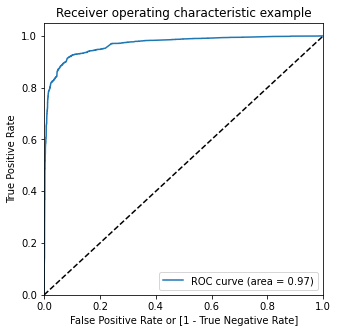

In [106]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 11: Finding Optimal Cutoff point

In [107]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.211524,630013,0,1,1,1,0,0,0,0,0,0,0
1,1,0.917059,585643,1,1,1,1,1,1,1,1,1,1,1
2,1,0.999859,631406,1,1,1,1,1,1,1,1,1,1,1
3,1,0.983350,660458,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012443,633361,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.825448,0.971360,0.732676
0.2,0.2,0.893476,0.932379,0.868741
0.3,0.3,0.913884,0.917661,0.911482
0.4,0.4,0.917130,0.887430,0.936014
0.5,0.5,0.918522,0.868735,0.950177
0.6,0.6,0.912492,0.830549,0.964593
0.7,0.7,0.908163,0.793158,0.981285
0.8,0.8,0.898578,0.760143,0.986596
0.9,0.9,0.880952,0.710024,0.989631


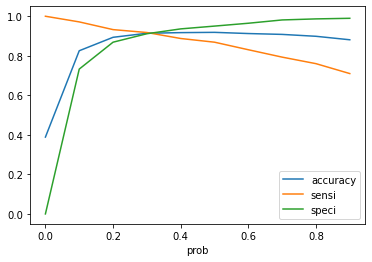

In [109]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.211524,630013,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.917059,585643,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.999859,631406,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.983350,660458,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012443,633361,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9138837353123067

In [112]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3604,  350],
       [ 207, 2307]], dtype=int64)

In [113]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [114]:
# Calculating the sensitivity
TP/(TP+FN)

0.9176610978520287

In [115]:
# Calculating the specificity
TN/(TN+FP)

0.9114820435002529

### Step 12: Prediction on the Test set

In [116]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [117]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_SMS Sent,What matters most to you in choosing a course_Not Provided,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
Lead Number,,,,,,,,,,,,,
654415,1.0,0.147359,0,0,0,0,0,0,1,0,0,0,0
637416,1.0,0.688859,0,0,0,0,0,0,0,0,0,1,0
644173,1.0,0.596538,0,0,0,0,0,0,0,0,0,0,0
596521,1.0,0.083000,0,0,0,0,0,0,0,0,0,0,0
589639,1.0,0.311585,0,0,0,0,0,0,0,0,0,0,0


In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Converting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob
0,0,654415,0.004651
1,0,637416,0.203693
2,0,644173,0.515469
3,0,596521,0.161331
4,0,589639,0.291710


In [119]:
# Making prediction using cut off 0.3

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,final_predicted
0,0,654415,0.004651,0
1,0,637416,0.203693,0
2,0,644173,0.515469,1
3,0,596521,0.161331,0
4,0,589639,0.291710,0


In [120]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9116161616161617

In [121]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1576,  149],
       [  96,  951]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Calculating the sensitivity
TP/(TP+FN)

0.9083094555873925

In [124]:
# Calculating the specificity
TN/(TN+FP)

0.9136231884057971

### Precision - Recall

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3757,  197],
       [ 330, 2184]], dtype=int64)

In [126]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9172616547669047

### Precision - Recall Trade off

In [127]:
from sklearn.metrics import precision_recall_curve

In [128]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

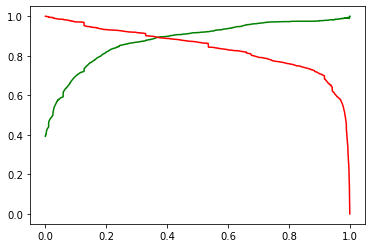

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.211524,630013,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.917059,585643,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.999859,631406,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.983350,660458,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012443,633361,0,1,0,0,0,0,0,0,0,0,0,0


In [132]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9172850958565244

In [133]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3694,  260],
       [ 275, 2239]], dtype=int64)

In [134]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [135]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8959583833533413

In [136]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.890612569610183

### Prediction on Test set

In [137]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob
0,0,654415,0.004651
1,0,637416,0.203693
2,0,644173,0.515469
3,0,596521,0.161331
4,0,589639,0.291710


In [138]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,final_predicted
0,0,654415,0.004651,0
1,0,637416,0.203693,0
2,0,644173,0.515469,1
3,0,596521,0.161331,0
4,0,589639,0.291710,0


In [139]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9184704184704184

In [140]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1620,  105],
       [ 121,  926]], dtype=int64)

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8981571290009699

In [143]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8844317096466093

- Model 4 is doing well in test data as well
- Recall is approximately 90% which states that our model predicts as expected

### Assigning Lead score in the data frame

In [144]:
#Creating new df
 
lead_score_df = pd.DataFrame()

df1=y_train_pred_final[['Lead Number','Conversion_Prob']]

df2=y_pred_final[['Lead Number','Conversion_Prob']]

In [145]:
lead_score_df = df1.append(df2,ignore_index=True)

In [146]:
#Assigning the value to the Lead Score by Multiplying 100

lead_score_df['Lead Score'] = lead_score_df['Conversion_Prob'].apply(lambda x: round((x*100),2))

In [147]:
#Dropping Conversion_Prob

lead_score_df.drop('Conversion_Prob',1,inplace=True)

lead_score_df.head()

,Lead Number,Lead Score
0,630013,21.15
1,585643,91.71
2,631406,99.99
3,660458,98.34
4,633361,1.24


In [148]:
res.params

const                                                        -1.924776
Total Time Spent on Website                                   3.330339
Lead Origin_Lead Add Form                                     2.651519
Last Activity_Email Bounced                                  -1.247022
Last Activity_SMS Sent                                        2.064725
What matters most to you in choosing a course_Not Provided   -0.851376
Tags_Closed by Horizzon                                       6.296253
Tags_Lost to EINS                                             5.673303
Tags_Ringing                                                 -3.931939
Tags_Will revert after reading the email                      4.322655
Tags_switched off                                            -5.295320
Last Notable Activity_Modified                               -1.732728
Last Notable Activity_Olark Chat Conversation                -0.780608
dtype: float64

### Conclusion:

- Logistics model is used to predict the probability of conversion of the customers.
- Our final model 4 is built with 12 features
- Based on the ROC curve, the optimal cut off is 0.3 i.e. any lead with greater than 0.3 probability of converting is predicted as Hot Lead. 
- Following are the most important variables that a lead can become a converter:

    - Tags_Closed by Horizzon
    - Tags_Lost to EINS
    - Total Time Spent on Website
    - Tags_Will revert after reading the email
    - Last Activity_SMS Sent